In [1]:
!pip install git+https://github.com/AutoViML/Auto_ViML.git
!pip install scipy==1.9.3

  Cloning https://github.com/AutoViML/Auto_ViML.git to /tmp/pip-req-build-_cuvtzum
  Running command git clone --filter=blob:none --quiet https://github.com/AutoViML/Auto_ViML.git /tmp/pip-req-build-_cuvtzum
  Resolved https://github.com/AutoViML/Auto_ViML.git to commit 9e1fdb07e48d369c80a9366422f5c9bec12d39e3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
import pandas as pd
train=pd.read_csv('/kaggle/input/pss4e11-data-cleaning-using-clearlab/train.csv')
train.head()

,Male,Age,Working,AcademicPressure,WorkPressure,CGPA,StudySatisfaction,JobSatisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_,WorkStudyHours,FinancialStress,Family_History_of_Mental_Illness,Name,City,Profession,Degree,Depression
0,0,49,1,-1,5,-1,-1,2,3,2,0,1,2,0,Aaradhya,Ludhiana,Chef,BHM,0
1,1,26,1,-1,4,-1,-1,3,0,0,1,7,3,0,Vivan,Varanasi,Teacher,LLB,1
2,1,33,0,5,-1,8,2,-1,1,2,1,3,1,0,Yuvraj,Visakhapatnam,Unknown,B.Pharm,1
3,1,22,1,-1,5,-1,-1,1,0,1,1,10,1,1,Yuvraj,Mumbai,Teacher,BBA,1
4,0,30,1,-1,1,-1,-1,1,1,0,1,9,4,1,Rhea,Kanpur,Business_Analyst,BBA,1


In [3]:
test=pd.read_csv('/kaggle/input/pss4e11-data-cleaning-using-clearlab/test.csv')
test.head()

,Male,Age,Working,AcademicPressure,WorkPressure,CGPA,StudySatisfaction,JobSatisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_,WorkStudyHours,FinancialStress,Family_History_of_Mental_Illness,Name,City,Profession,Degree
0,1,53,1,-1,2,-1,-1,5,0,1,0,9,3,1,Shivam,Visakhapatnam,Judge,LLB
1,0,58,1,-1,2,-1,-1,4,0,1,0,6,4,0,Sanya,Kolkata,Educational_Consultant,B.Ed
2,1,53,1,-1,4,-1,-1,1,2,1,1,12,4,0,Yash,Jaipur,Teacher,B.Arch
3,0,23,0,5,-1,6,1,-1,3,1,1,10,4,0,Nalini,Rajkot,Unknown,BSc
4,1,47,1,-1,5,-1,-1,5,2,1,1,3,4,0,Shaurya,Kalyan,Teacher,BCA


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140661 entries, 0 to 140660
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Male                                  140661 non-null  int64 
 1   Age                                   140661 non-null  int64 
 2   Working                               140661 non-null  int64 
 3   AcademicPressure                      140661 non-null  int64 
 4   WorkPressure                          140661 non-null  int64 
 5   CGPA                                  140661 non-null  int64 
 6   StudySatisfaction                     140661 non-null  int64 
 7   JobSatisfaction                       140661 non-null  int64 
 8   Sleep_Duration                        140661 non-null  int64 
 9   Dietary_Habits                        140661 non-null  int64 
 10  Have_you_ever_had_suicidal_thoughts_  140661 non-null  int64 
 11  WorkStudyHour

In [5]:
train.nunique().sort_values(ascending=False)

Name                                    217
Age                                      43
Profession                               36
City                                     31
Degree                                   28
WorkStudyHours                           13
CGPA                                      7
AcademicPressure                          6
WorkPressure                              6
StudySatisfaction                         6
JobSatisfaction                           6
FinancialStress                           6
Sleep_Duration                            5
Dietary_Habits                            4
Male                                      2
Family_History_of_Mental_Illness          2
Have_you_ever_had_suicidal_thoughts_      2
Working                                   2
Depression                                2
dtype: int64

In [6]:
train.isnull().sum()

Male                                    0
Age                                     0
Working                                 0
AcademicPressure                        0
WorkPressure                            0
CGPA                                    0
StudySatisfaction                       0
JobSatisfaction                         0
Sleep_Duration                          0
Dietary_Habits                          0
Have_you_ever_had_suicidal_thoughts_    0
WorkStudyHours                          0
FinancialStress                         0
Family_History_of_Mental_Illness        0
Name                                    0
City                                    0
Profession                              0
Degree                                  0
Depression                              0
dtype: int64

In [7]:
for i in test.select_dtypes(include=['object']).columns.tolist():
    if (len(list(set(train[i].unique().tolist())^set(test[i].unique().tolist())))!=0):
        print(i ,'need to be worked on')
    else:
        continue

print('No work needed')

No work needed


In [8]:
train[test.select_dtypes(include=['object']).columns.tolist()].head()

,Name,City,Profession,Degree
0,Aaradhya,Ludhiana,Chef,BHM
1,Vivan,Varanasi,Teacher,LLB
2,Yuvraj,Visakhapatnam,Unknown,B.Pharm
3,Yuvraj,Mumbai,Teacher,BBA
4,Rhea,Kanpur,Business_Analyst,BBA


In [9]:
train.describe()

,Male,Age,Working,AcademicPressure,WorkPressure,CGPA,StudySatisfaction,JobSatisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_,WorkStudyHours,FinancialStress,Family_History_of_Mental_Illness,Depression
count,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000,140661.000000
mean,0.550536,40.390975,0.801772,-0.178969,2.206056,0.612842,-0.218149,2.186427,1.451262,0.989073,0.494359,6.252714,2.988654,0.497110,0.176637
std,0.497441,12.383009,0.398667,1.762011,2.031404,3.305554,1.685075,2.029458,1.125829,0.804483,0.499970,3.853524,1.413721,0.499993,0.381363
min,0.000000,18.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,29.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,42.000000,1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,1.000000,1.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,-1.000000,4.000000,-1.000000,-1.000000,4.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,1.000000,5.000000,5.000000,10.000000,5.000000,5.000000,3.000000,2.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [10]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:
import numpy as np
train = reduce_mem_usage(train)
train.info()

Memory usage of dataframe is 20.39 MB
Memory usage after optimization is: 6.30 MB
Decreased by 69.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140661 entries, 0 to 140660
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Male                                  140661 non-null  int8  
 1   Age                                   140661 non-null  int8  
 2   Working                               140661 non-null  int8  
 3   AcademicPressure                      140661 non-null  int8  
 4   WorkPressure                          140661 non-null  int8  
 5   CGPA                                  140661 non-null  int8  
 6   StudySatisfaction                     140661 non-null  int8  
 7   JobSatisfaction                       140661 non-null  int8  
 8   Sleep_Duration                        140661 non-null  int8  
 9   Dietary_Habits                        140661 n

In [12]:
test = reduce_mem_usage(test)
test.info()

Memory usage of dataframe is 12.88 MB
Memory usage after optimization is: 4.12 MB
Decreased by 68.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Male                                  93800 non-null  int8  
 1   Age                                   93800 non-null  int8  
 2   Working                               93800 non-null  int8  
 3   AcademicPressure                      93800 non-null  int8  
 4   WorkPressure                          93800 non-null  int8  
 5   CGPA                                  93800 non-null  int8  
 6   StudySatisfaction                     93800 non-null  int8  
 7   JobSatisfaction                       93800 non-null  int8  
 8   Sleep_Duration                        93800 non-null  int8  
 9   Dietary_Habits                        93800 non-null  int8 

In [13]:
round(train['Depression'].value_counts()*100/len(train),2)

0    82.34
1    17.66
Name: Depression, dtype: float64

In [14]:
train.duplicated().value_counts()

False    140661
dtype: int64

In [15]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [16]:
sol=pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')
sol.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


==================== System Information ====================
System: Linux
Node Name: 876470d3280d
Release: 5.15.154+
Version: #1 SMP Thu Jun 27 20:43:36 UTC 2024
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 2
Total cores: 4
==================== Memory Information ====================
Total: 31.36GB
Available: 30.07GB
Used: 860.81MB
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (140661, 19)
    Training Set Memory Usage = 6.30 MB
Test Set Shape = (93800, 18)
    Test Set Memory Usage = 4.12 MB
Single_Label Target: ['Depression']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  115815  ->   82.3%
           1:   24846  ->   17.7%
    Target Depression is already numeric. No transformation done.
######################################

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

    Actual training time (in seconds): 57
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  roc_auc = 99.3%
    CatBoost Best Parameters for Model: Iterations = 1288, learning_rate = 0.05
Finding Best Threshold for Highest F1 Score...


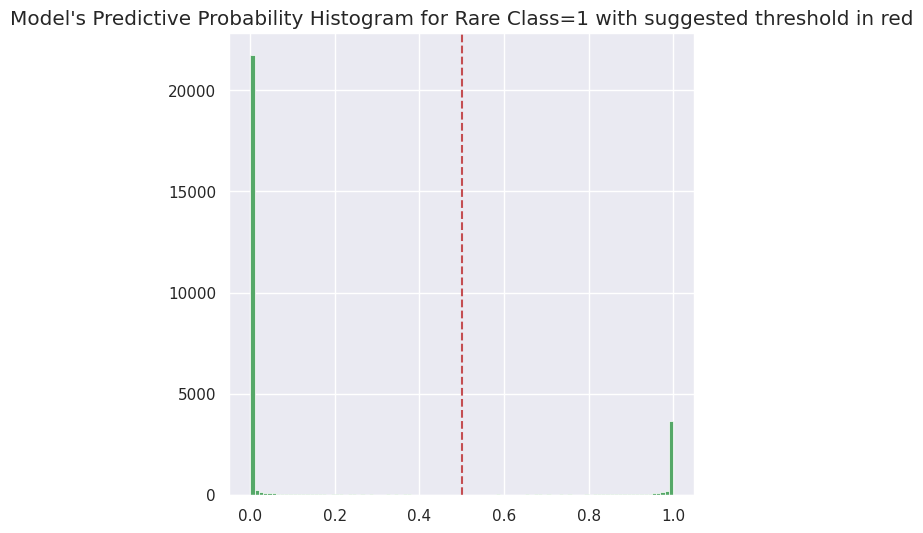

    Using threshold=0.5. However, 0.501 provides better F1=0.98 for rare class...
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 99.2%
Balanced Accuracy = 98.63% with Threshold = 0.50
Confusion Matrix:
[[23070    94]
 [  116  4853]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23164
           1       0.98      0.98      0.98      4969

    accuracy                           0.99     28133
   macro avg       0.99      0.99      0.99     28133
weighted avg       0.99      0.99      0.99     28133

Balanced Accuracy = 98.63% with Threshold = 0.50
Confusion Matrix:
[[23070    94]
 [  116  4853]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23164
           1       0.98      0.98      0.98      4969

    accuracy                           0.99     28133
   macro avg       0.99   

    ROC AUC Score = 100.0%


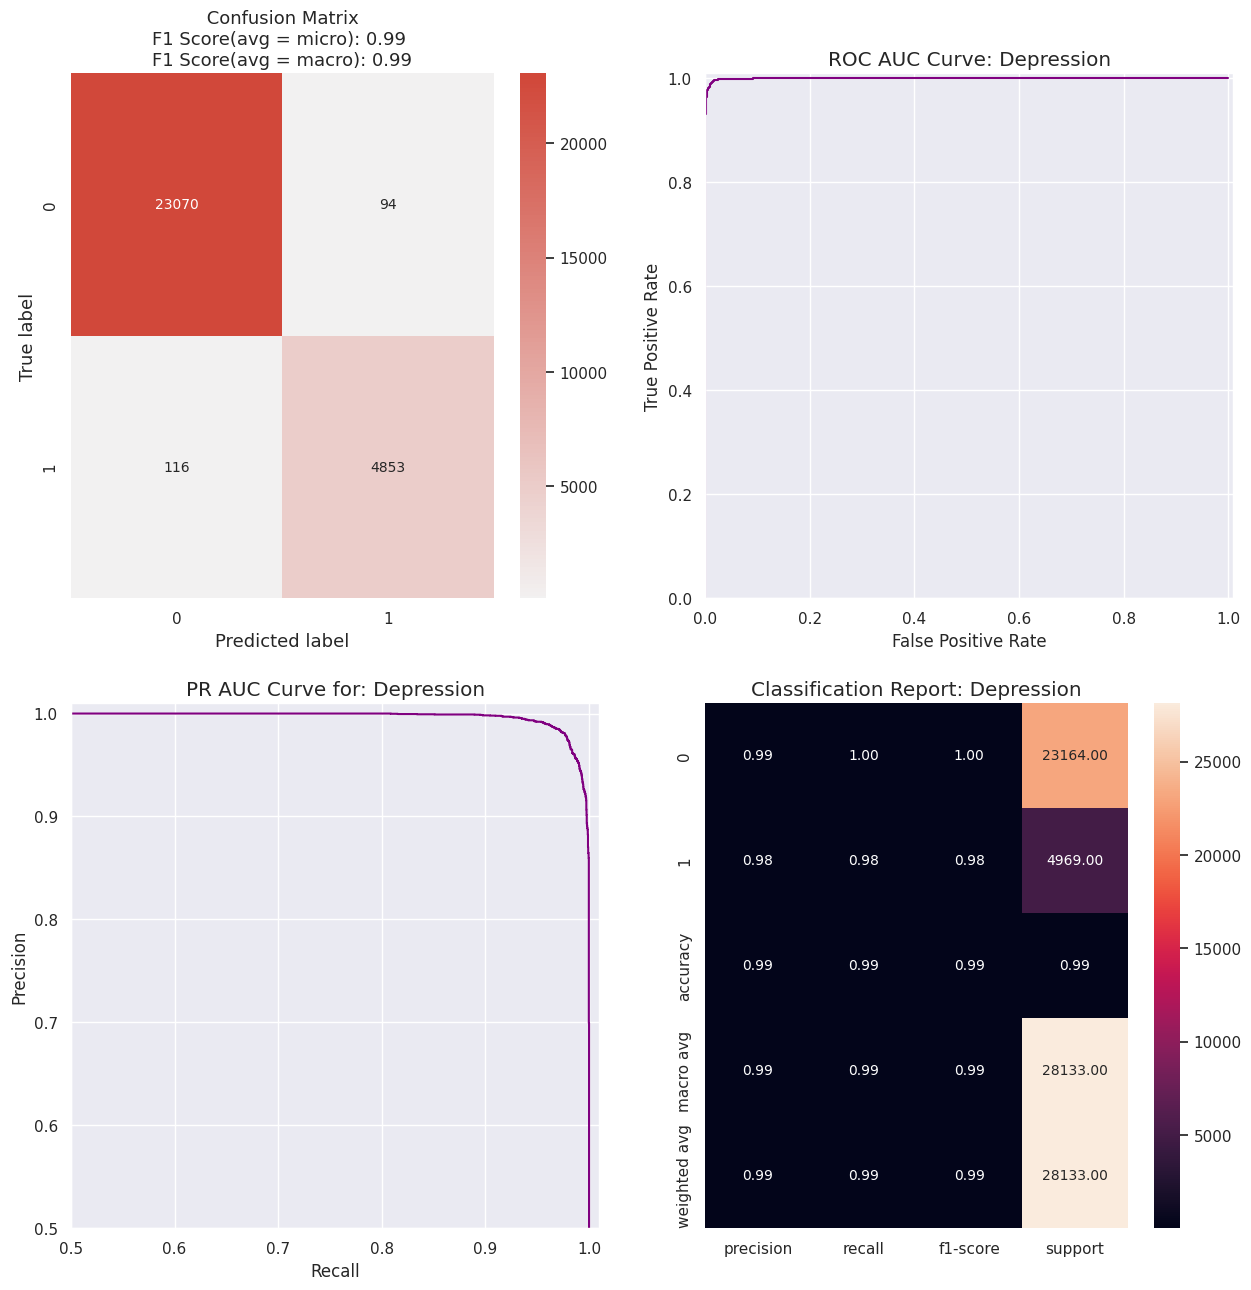

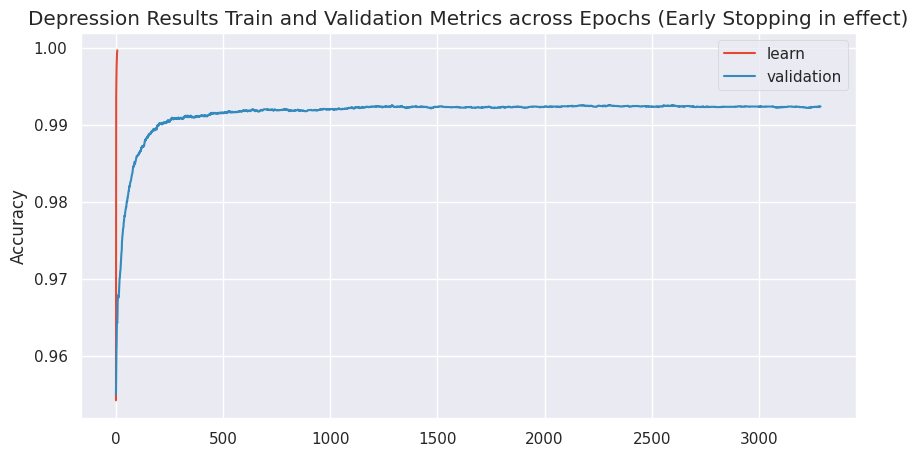

    Time taken for this Target (in seconds) = 66
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 8
No MinMax scaling performed since scaling flag is set to false
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 27
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.501
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...
Coul

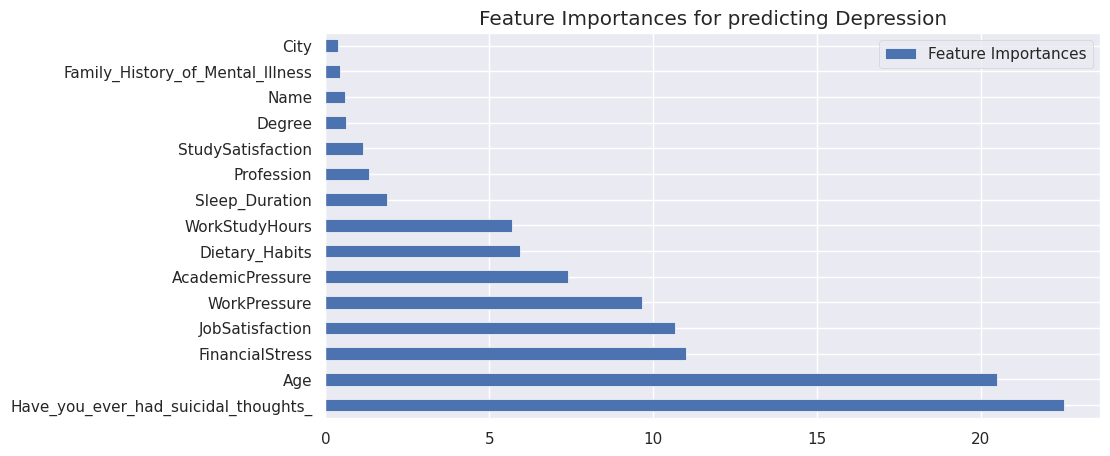

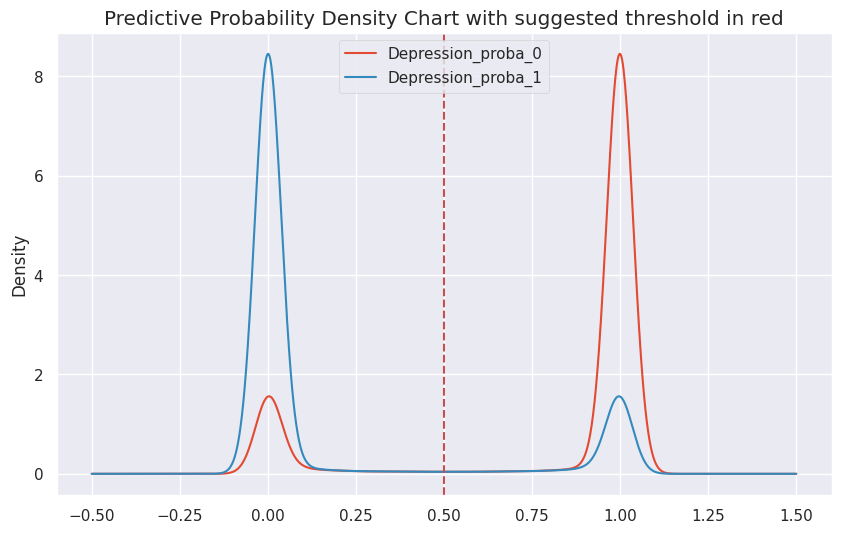

In [17]:
m, feats, trainm, testm = Auto_ViML(train, target='Depression',test=test,
                            sample_submission=sol,scoring_parameter='roc_auc',
                             KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=2)

In [18]:
df=pd.read_csv('/kaggle/working/Depression/Depression_Binary_Classification_test_modified.csv')
df.head()

,Male,Working,Have_you_ever_had_suicidal_thoughts_,Family_History_of_Mental_Illness,Name,City,Profession,Degree,Age,AcademicPressure,WorkPressure,CGPA,StudySatisfaction,JobSatisfaction,Sleep_Duration,Dietary_Habits,WorkStudyHours,FinancialStress,Depression_proba_0,Depression_proba_1,Depression_predictions,Depression_Logistic_Regression_CV_predictions,Depression_Decision_Tree_predictions,Depression_Naive_Bayes_predictions,Depression_Bagging_Classifier_predictions,Depression_CatBoost_predictions,Depression_Ensembled_predictions
0,1,1,0,1,169,30,20,12,53,-1,2,-1,-1,5,0,1,9,3,1.00,0.00,0.00,0,0,0,0,0.00,0
1,0,1,0,0,162,13,12,2,58,-1,2,-1,-1,4,0,1,6,4,1.00,0.00,0.00,0,0,0,0,0.00,0
2,1,1,1,0,211,10,32,0,53,-1,4,-1,-1,1,2,1,12,4,1.00,0.00,0.00,0,0,0,0,0.00,0
3,0,0,1,0,112,22,35,10,23,5,-1,6,1,-1,3,1,10,4,0.00,1.00,1.00,1,1,1,1,1.00,1
4,1,1,1,0,167,11,32,7,47,-1,5,-1,-1,5,2,1,3,4,1.00,0.00,0.00,0,0,0,0,0.00,0


In [19]:
sol['Depression']=df['Depression_Ensembled_predictions']
sol.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [20]:
sol.to_csv('./Auto_ViML.csv',index=False)